<a href="https://colab.research.google.com/github/pks98/NLP_Reviews/blob/main/EDA_binaryclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df=pd.read_csv('reviews.csv',usecols=['Review_Title','Reviews','Rating'])
df.head()

,Review_Title,Reviews,Rating
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5.0
1,Enjoy while it lasts,This is the second time I am writing this revi...,2.0
2,Good,1. Quite good look2. Better noise cancellation...,4.0
3,not great,its a good set of ear buds but1. the quality o...,1.0
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3620 entries, 0 to 3619
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Review_Title  3620 non-null   object 
 1   Reviews       3517 non-null   object 
 2   Rating        3620 non-null   float64
dtypes: float64(1), object(2)
memory usage: 85.0+ KB


In [5]:
df.isna().sum()

Review_Title      0
Reviews         103
Rating            0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(3517, 3)

In [8]:
def rating_classify(rating):
  if rating>=4:
    return 1
  else:
    return 0

In [10]:
df['label']=df['Rating'].apply(rating_classify)

In [11]:
df.head()

,Review_Title,Reviews,Rating,label
0,AWESOME...IN LOVE WITH IT !,Really impressed with the fastest delivery of ...,5.0,1
1,Enjoy while it lasts,This is the second time I am writing this revi...,2.0,0
2,Good,1. Quite good look2. Better noise cancellation...,4.0,1
3,not great,its a good set of ear buds but1. the quality o...,1.0,0
4,Best buds in the budget with Type C,I have been researching about getting a nice T...,5.0,1


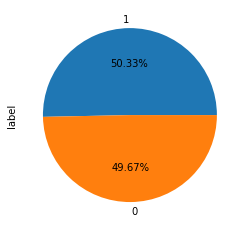

In [14]:
df['label'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
port_stem=PorterStemmer()
def text_processing(text):
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text=text.split()
  text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [17]:
df['Reviews'].head()

0    Really impressed with the fastest delivery of ...
1    This is the second time I am writing this revi...
2    1. Quite good look2. Better noise cancellation...
3    its a good set of ear buds but1. the quality o...
4    I have been researching about getting a nice T...
Name: Reviews, dtype: object

In [21]:
df['Reviews']=df['Reviews'].apply(text_processing)

In [22]:
df.head()

,Review_Title,Reviews,Rating,label
0,AWESOME...IN LOVE WITH IT !,realli impress fastest deliveri amazon order y...,5.0,1
1,Enjoy while it lasts,second time write review sure earlier detail r...,2.0,0
2,Good,quit good look better nois cancel good base qu...,4.0,1
3,not great,good set ear bud qualiti sound get bad connect...,1.0,0
4,Best buds in the budget with Type C,research get nice tw bud everyday use prioriti...,5.0,1


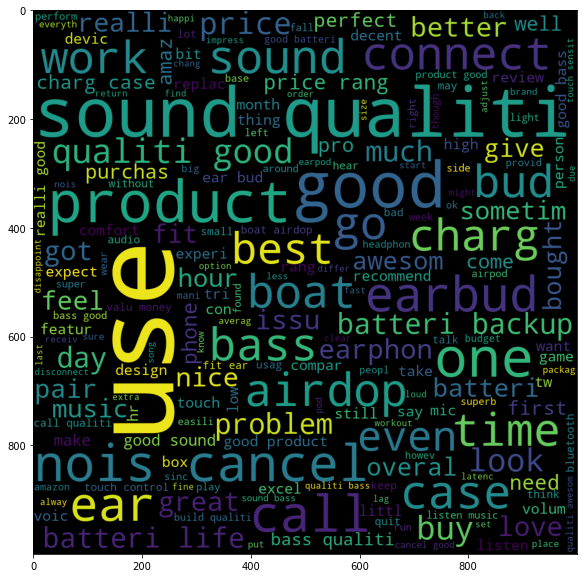

In [24]:
from wordcloud import WordCloud

wc=WordCloud(width=1000,height=1000)
positive_wordcloud=wc.generate(df[df['label']==1]['Reviews'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(positive_wordcloud)

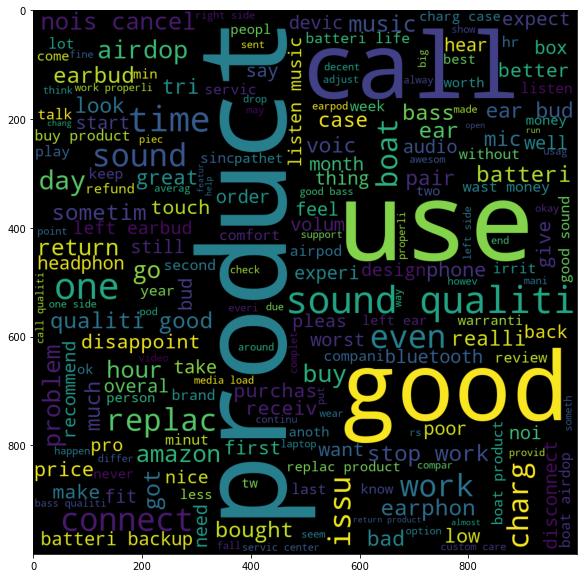

In [25]:
wc=WordCloud(width=1000,height=1000)
negative_wordcloud=wc.generate(df[df['label']==0]['Reviews'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(negative_wordcloud)

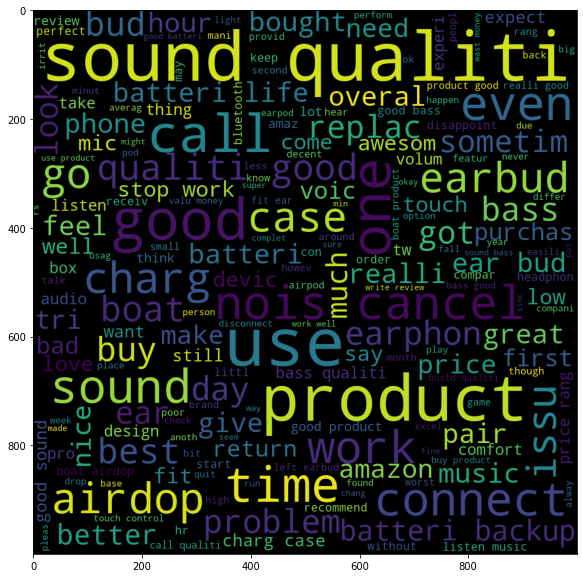

In [26]:
wc=WordCloud(width=1000,height=1000)
wordcloud=wc.generate(df['Reviews'].str.cat(sep=' '))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

In [27]:
positive_corpus=[]
for reviews in df[df['label']==1]['Reviews'].tolist():
  for word in reviews.split():
    positive_corpus.append(word)

In [28]:
len(positive_corpus)

65643

In [29]:
negative_corpus=[]
for reviews in df[df['label']==0]['Reviews'].tolist():
  for word in reviews.split():
    negative_corpus.append(word)

In [30]:
len(negative_corpus)

58151

In [31]:
from collections import Counter

positive_corpus_data=Counter(positive_corpus).most_common(50)
positive_corpus_df=pd.DataFrame(positive_corpus_data,columns=['word','frequency'])
positive_corpus_df.head()

,word,frequency
0,good,1891
1,qualiti,1475
2,sound,1388
3,use,1149
4,product,1095


In [32]:
negative_corpus_data=Counter(negative_corpus).most_common(50)
negative_corpus_df=pd.DataFrame(negative_corpus_data,columns=['word','frequency'])
negative_corpus_df.head()

,word,frequency
0,product,1432
1,good,1065
2,sound,1006
3,use,944
4,qualiti,933


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


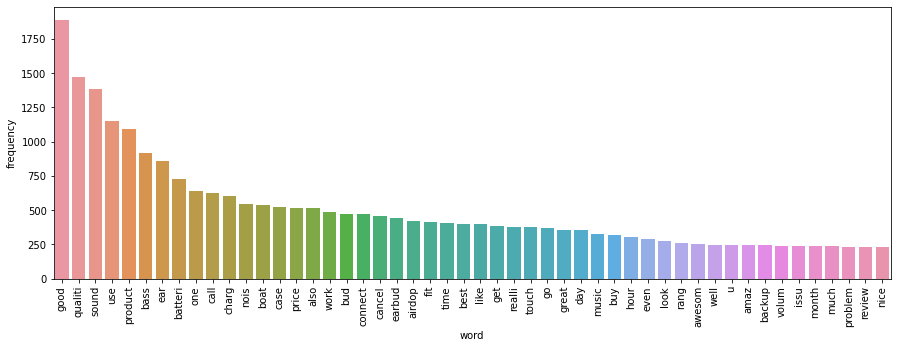

In [33]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.barplot(positive_corpus_df['word'],positive_corpus_df['frequency'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


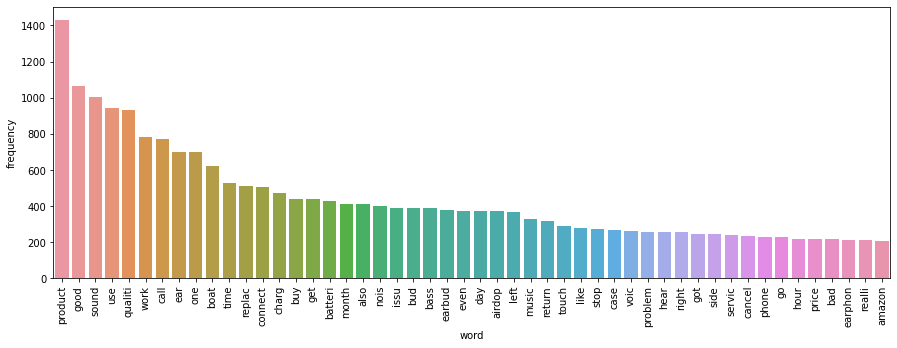

In [34]:
plt.figure(figsize=(15,5))
plt.xticks(rotation='vertical')
sns.barplot(negative_corpus_df['word'],negative_corpus_df['frequency'])

In [37]:
tf=TfidfVectorizer(max_features=3000)
x=tf.fit_transform(df['Reviews']).toarray()
y=df['label'].values

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [39]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [41]:
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))


0.5596590909090909
0.5826771653543307


In [42]:
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))


0.7869318181818182
0.7686170212765957


In [43]:
bnb.fit(x_train,y_train)
pred=bnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))

0.7613636363636364
0.7787878787878788


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


In [45]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [46]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [47]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [48]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [49]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.768466,0.769231
2,NB,0.786932,0.768617
8,ETC,0.769886,0.768362
4,LR,0.775568,0.767956
5,RF,0.771307,0.763085
10,xgb,0.744318,0.733696
7,BgC,0.735795,0.730556
9,GBDT,0.737216,0.728767
6,AdaBoost,0.711648,0.712251
1,KN,0.701705,0.692935
